In [142]:
#Import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gzip
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

Import the data

In [125]:
#get data from saved pickle
df = pd.read_pickle('./cleaned-data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, kzwfHumJyYc to K10YIAokjvE
Data columns (total 16 columns):
trending_date             32562 non-null datetime64[ns]
title                     32562 non-null object
channel_title             32562 non-null object
category_id               32562 non-null category
publish_time              32562 non-null datetime64[ns, UTC]
tags                      32562 non-null object
views                     32562 non-null int64
likes                     32562 non-null int64
dislikes                  32562 non-null int64
comment_count             32562 non-null int64
thumbnail_link            32562 non-null object
comments_disabled         32562 non-null bool
ratings_disabled          32562 non-null bool
video_error_or_removed    32562 non-null bool
description               32562 non-null object
publish_day               32562 non-null object
dtypes: bool(3), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(6)
memory

In [126]:
df.sample(15)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day
video_id,,,,,,,,,,,,,,,,
xwA2L2HogYI,2017-11-18,போடா தேவி யா பையன் ஜோதிகாவை காரி துப்பிய si...,Connecting,24,2017-11-16 10:45:17+00:00,"Vijay|""Thalapathy Vijay""|""Vijay62""|""Annadurai ...",178601,386,308,117,https://i.ytimg.com/vi/xwA2L2HogYI/default.jpg,False,False,False,போடா தேவி யா பையன் ஜோதிகாவை காரி துப்பிய si...,Thursday
4jXR7eYhAUY,2018-03-22,കല്ല്യാണ പെണ്ണ് ഡാൻസുകളിച്ചു വരൻ മാത്രമല്ല ഞെട...,FILM COURT,24,2018-03-20 11:39:08+00:00,"Film news|""malayalam news""|""film gossip""|""movi...",118440,223,188,37,https://i.ytimg.com/vi/4jXR7eYhAUY/default.jpg,False,False,False,Watch കല്ല്യാണ പെണ്ണ് ഡാൻസുകളിച്ചു വരൻ മാത്രമല...,Tuesday
eRvFPKbQi04,2017-11-23,Theeran - Real Bawaria Gang as brutal as in fi...,BehindwoodsTV,24,2017-11-20 11:36:50+00:00,"Theeran Athigaram Ondru|""Theeran""|""Theeran Mov...",98825,2681,34,258,https://i.ytimg.com/vi/eRvFPKbQi04/default.jpg,False,False,False,Theeran Athigaram Ondru Got released on 17 Nov...,Monday
BgW30TWkwzQ,2018-01-14,Jai Simha Genuine Public Response | Balakrishn...,News Mantra,24,2018-01-12 01:00:58+00:00,"Jai Simha Genuine Public Response|""Balakrishna...",233571,1392,614,0,https://i.ytimg.com/vi/BgW30TWkwzQ/default.jpg,True,False,False,Jai Simha Genuine Public Response. #Jai Simha...,Friday
1LTpixReuyg,2018-05-02,"सांस रोक देने वाले मैच में, धोनी की चतुराई से ...",Sports Edge,17,2018-04-30 20:18:49+00:00,"सांस रोक देने वाले मैच में|""धोनी की चतुराई से ...",342810,5669,1035,392,https://i.ytimg.com/vi/1LTpixReuyg/default.jpg,False,False,False,"सांस रोक देने वाले मैच में, धोनी की चतुराई से ...",Monday
w_MXsyIrfCg,2018-05-21,Ministry list of H.D.Kumaraswamy's Government,Btv Kannada Ɩ ಬಿಟಿವಿ ಕನ್ನಡ,25,2018-05-19 12:52:46+00:00,"#BtvNewsLive|""#BtvKannada""|""Ministry list of H...",171253,418,146,56,https://i.ytimg.com/vi/w_MXsyIrfCg/default.jpg,False,False,False,Btv News : Ministry list of H.D.Kumaraswamy's ...,Saturday
HnfRlop7Rn4,2018-01-16,Baal Veer - बाल वीर - Episode 841 - 14th Janua...,Sony PAL,24,2018-01-14 19:40:51+00:00,"Powers|""Hero""|""School""|""Baalveer""|""Dev Joshi""|...",78961,166,42,15,https://i.ytimg.com/vi/HnfRlop7Rn4/default.jpg,False,False,False,Click here to watch the full episode of Baalve...,Sunday
ZsVOcEy8Ewk,2018-04-26,ਕਿਰਨ ਬਾਲਾ ਨੇ ਅਵਦੇ ਸੋਹਰੇ ਨਾਲ Call Recoding ਆਈ ਸ...,Rk Productions,25,2018-04-21 04:53:51+00:00,[none],91772,246,91,93,https://i.ytimg.com/vi/ZsVOcEy8Ewk/default.jpg,False,False,False,ਮੂੰਹ ਤੋੜ ਜਵਾਵ।,Saturday
daDh5JJdLYw,2018-05-11,Kapil Dev ने गुस्से में आकर Rishabh Pant को दी...,NH 24,25,2018-05-10 18:04:14+00:00,[none],456897,8818,2037,964,https://i.ytimg.com/vi/daDh5JJdLYw/default.jpg,False,False,False,Kapil Dev ने गुस्से में आकर Rishabh Pant को दी...,Thursday


Define a category based on number of views dividing the dataset into 10 different categories

In [127]:
def f(row):
    if row['views'] < 40000:
        return 9
    elif row['views'] < 80000:
        return 8
    elif row['views'] < 130000:
        return 7
    elif row['views'] < 180000:
        return 6
    elif row['views'] < 250000:
        return 5
    elif row['views'] < 350000:
        return 4
    elif row['views'] < 500000:
        return 3
    elif row['views'] < 850000:
        return 2
    elif row['views'] < 1600000:
        return 1
    else:
        return 0
    
df['views_category'] = df.apply(f, axis=1)

In [128]:
for col in ['publish_day', 'views_category']:
    df[col] = df[col].astype('category')
df.groupby('views_category').count()['trending_date']

views_category
0    3901
1    3275
2    3858
3    3047
4    3161
5    3065
6    3081
7    3716
8    3541
9    1917
Name: trending_date, dtype: int64

Drop some columns which are texts and date. Convert all categories to int using labelencoder

In [129]:
df.drop(['title','channel_title','tags','thumbnail_link','description','views','trending_date','publish_time'], axis=1, inplace=True)
lb_make = LabelEncoder()
df['category_id'] = lb_make.fit_transform(df['category_id'])
df['publish_day'] = lb_make.fit_transform(df['publish_day'])
df['views_category'] = lb_make.fit_transform(df['views_category'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, kzwfHumJyYc to K10YIAokjvE
Data columns (total 9 columns):
category_id               32562 non-null int64
likes                     32562 non-null int64
dislikes                  32562 non-null int64
comment_count             32562 non-null int64
comments_disabled         32562 non-null bool
ratings_disabled          32562 non-null bool
video_error_or_removed    32562 non-null bool
publish_day               32562 non-null int64
views_category            32562 non-null int64
dtypes: bool(3), int64(6)
memory usage: 1.8+ MB


separate the data into 80% training data and 20% testing data.

In [130]:
x = df.drop(['views_category'], axis=1).values
y = df['views_category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1221)

In [131]:
y_test

video_id
XNi9thjL8k4    5
dRbzWTnwKgU    2
J6GbDoIqf0o    7
WDqnr5faNBg    4
ON6fCdE0XiM    1
              ..
kliVAzNZ-Pw    5
BEpzZy5dGZ8    2
RqLKhmNMYVY    4
tZZu1s6KZYo    9
x5q5PXHc2AU    0
Name: views_category, Length: 6513, dtype: int64

Logisitic Regression

In [132]:
logreg = LogisticRegression(class_weight='balanced', solver='newton-cg', penalty='l2', n_jobs=-1) 
param_grid = {'logreg__C' : np.logspace(-5, 5, 20)}
steps = [('scaler', MaxAbsScaler()),
         ('logreg', logreg)]
pipeline = Pipeline(steps)
score_func = make_scorer(f1_score, greater_is_better=True, average='weighted')
the_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1220)
logreg_cv = GridSearchCV(pipeline, param_grid, cv=the_cv, scoring=score_func)
print(type(x_train))
logreg_cv.fit(x_train, y_train)

<class 'numpy.ndarray'>


/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1220, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MaxAbsScaler(copy=True)), ('logreg', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logreg__C': array([1.00000e-05, 3.35982e-05, 1.12884e-04, 3.79269e-04, 1.27427e-03,
       4.28133e-03, 1.43845e-02, 4.83293e-02, 1.62378e-01, 5.45559e-01,
       1.83298e+00, 6.15848e+00, 2.06914e+01, 6.95193e+01, 2.33572e+02,
       7.84760e+02, 2.63665e+03, 8.85867e+03, 2.97635e+04, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [133]:
logreg_cv.best_score_

0.2416734326226551

In [134]:
steps = [('scaler', MaxAbsScaler()),
         ('logreg', LogisticRegression(C=logreg_cv.best_params_['logreg__C'], class_weight='balanced',
                                       solver='newton-cg', penalty='l2', n_jobs=-1)
         )]
logreg_best = Pipeline(steps)

logreg_best.fit(x_train, y_train)
pred = logreg_best.predict(x_test)
f1_score(y_test, pred, average='weighted')    

0.2515006740085835

In [135]:
df.groupby('views_category').count()['category_id']

views_category
0    3901
1    3275
2    3858
3    3047
4    3161
5    3065
6    3081
7    3716
8    3541
9    1917
Name: category_id, dtype: int64

Logistic regression has 25% accuracy on test data but it is very good for interpreation. Below heatmap shows that dislikes is the most and only significant feature. 

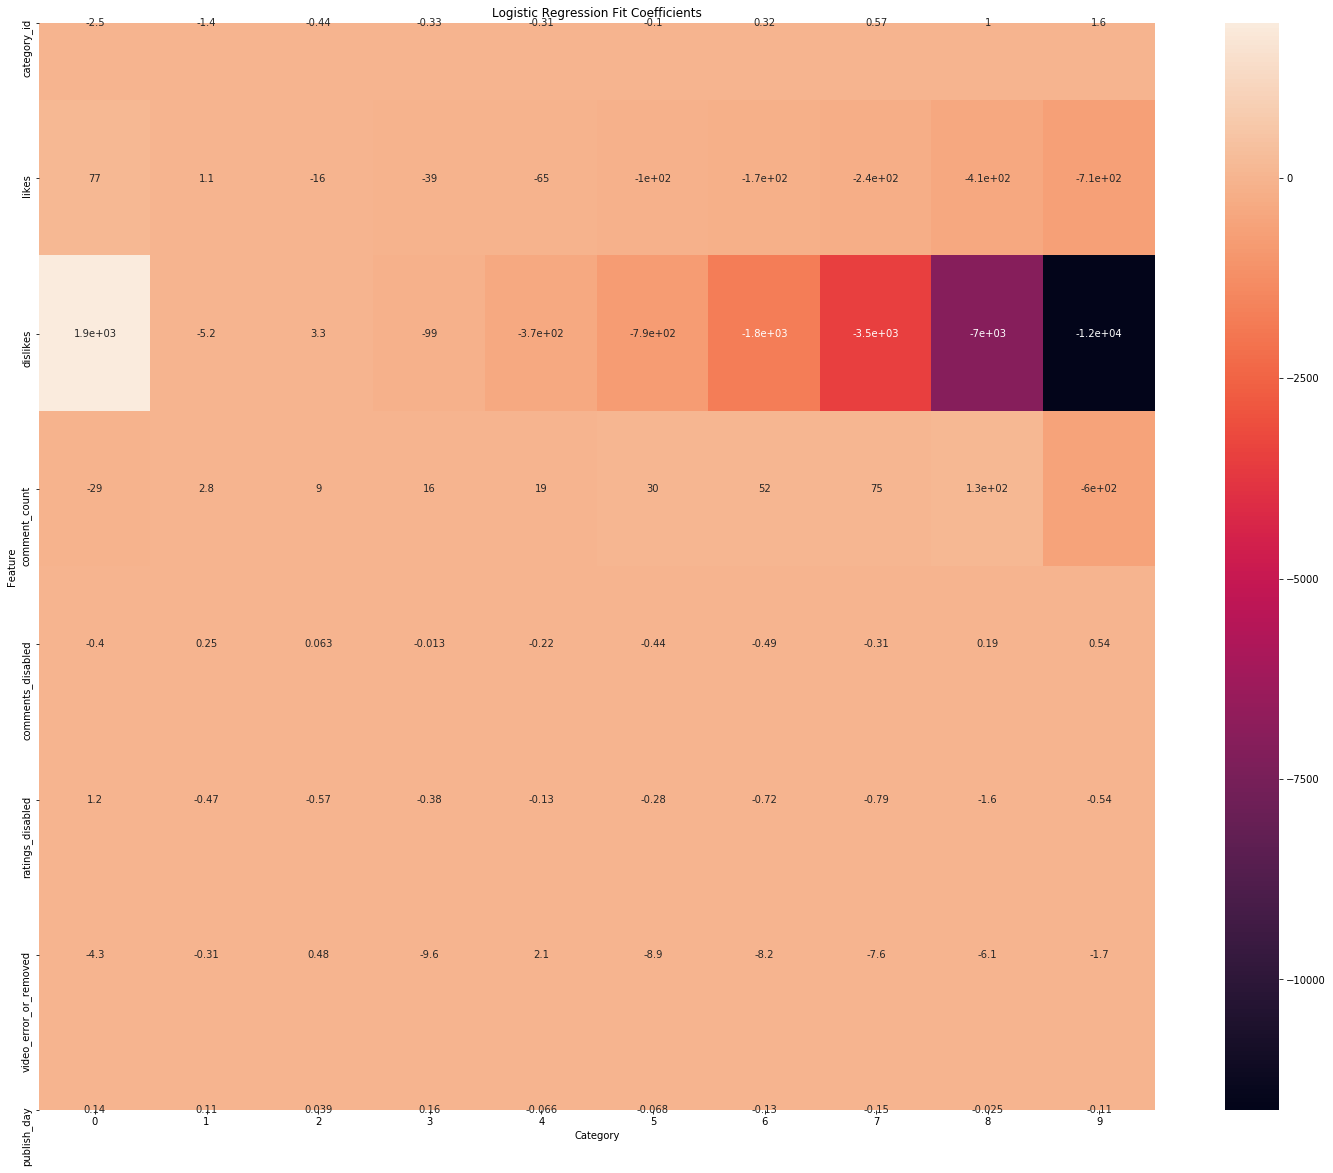

In [136]:
df_columns = df.drop(['views_category'], axis=1).columns.values
df_category = df['views_category'].value_counts().sort_index().index

#Plot the fit coefficients
sns.heatmap(pd.DataFrame(logreg_best.named_steps['logreg'].coef_, index=df_category, columns=df_columns).T, 
            annot=True)
plt.xlabel('Category')
plt.ylabel('Feature')
plt.title('Logistic Regression Fit Coefficients')
plt.rcParams["figure.figsize"] = (25,20)
plt.show()

KNN with standardscaler.

In [162]:
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['knn__n_neighbors'], 
                                      p=knn_cv.best_params_['knn__p'], weights='distance', n_jobs=-1)
param_grid = {'knn__n_neighbors' : range(2,15,1), 'knn__p' : range(1,3,1)}

steps1 = [('scaler', StandardScaler()),
         ('knn', knn)]
pipeline = Pipeline(steps1)

knn_cv = GridSearchCV(pipeline, param_grid, cv=the_cv, scoring=score_func)
knn_cv.fit(x_train, y_train)
pred = knn_cv.predict(x_test)
f1_score(y_test, pred, average='weighted')

/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validatio

/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validatio

/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validatio

/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validatio

0.4691976703940679

KNN has a better accuracy.

In [163]:
knn_cv.best_params_

{'knn__n_neighbors': 5, 'knn__p': 2}

SVC model

In [140]:
svc = SVC(kernel='rbf', probability=True, class_weight='balanced')
param_grid = {'svc__C' : np.logspace(2, 4, 3), 'svc__gamma' : [0.001, 0.01]}
steps = [('scaler', StandardScaler()),
         ('svc', svc)]
pipeline = Pipeline(steps)

svc_cv = GridSearchCV(pipeline, param_grid, cv=the_cv, scoring=score_func, n_jobs=-1)
svc_cv.fit(x_train, y_train)
steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel='rbf', probability=True, C=svc_cv.best_params_['svc__C'], 
                     gamma=svc_cv.best_params_['svc__gamma'], class_weight='balanced') 
         )]
svc_best = Pipeline(steps)

svc_best.fit(x_train, y_train)
pred = svc_best.predict(x_test)
f1_score(y_test, pred, average='weighted')

/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validatio

0.3092656669158993

Random Forest

In [164]:
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
f1_score(y_test, pred, average='weighted')

0.48176031355478155

Random forest has the best accuracy. so, lets do some more analysis

In [165]:
from sklearn.metrics import roc_curve, auc, accuracy_score
accuracy_score(y_test, pred)

0.48380162751420236

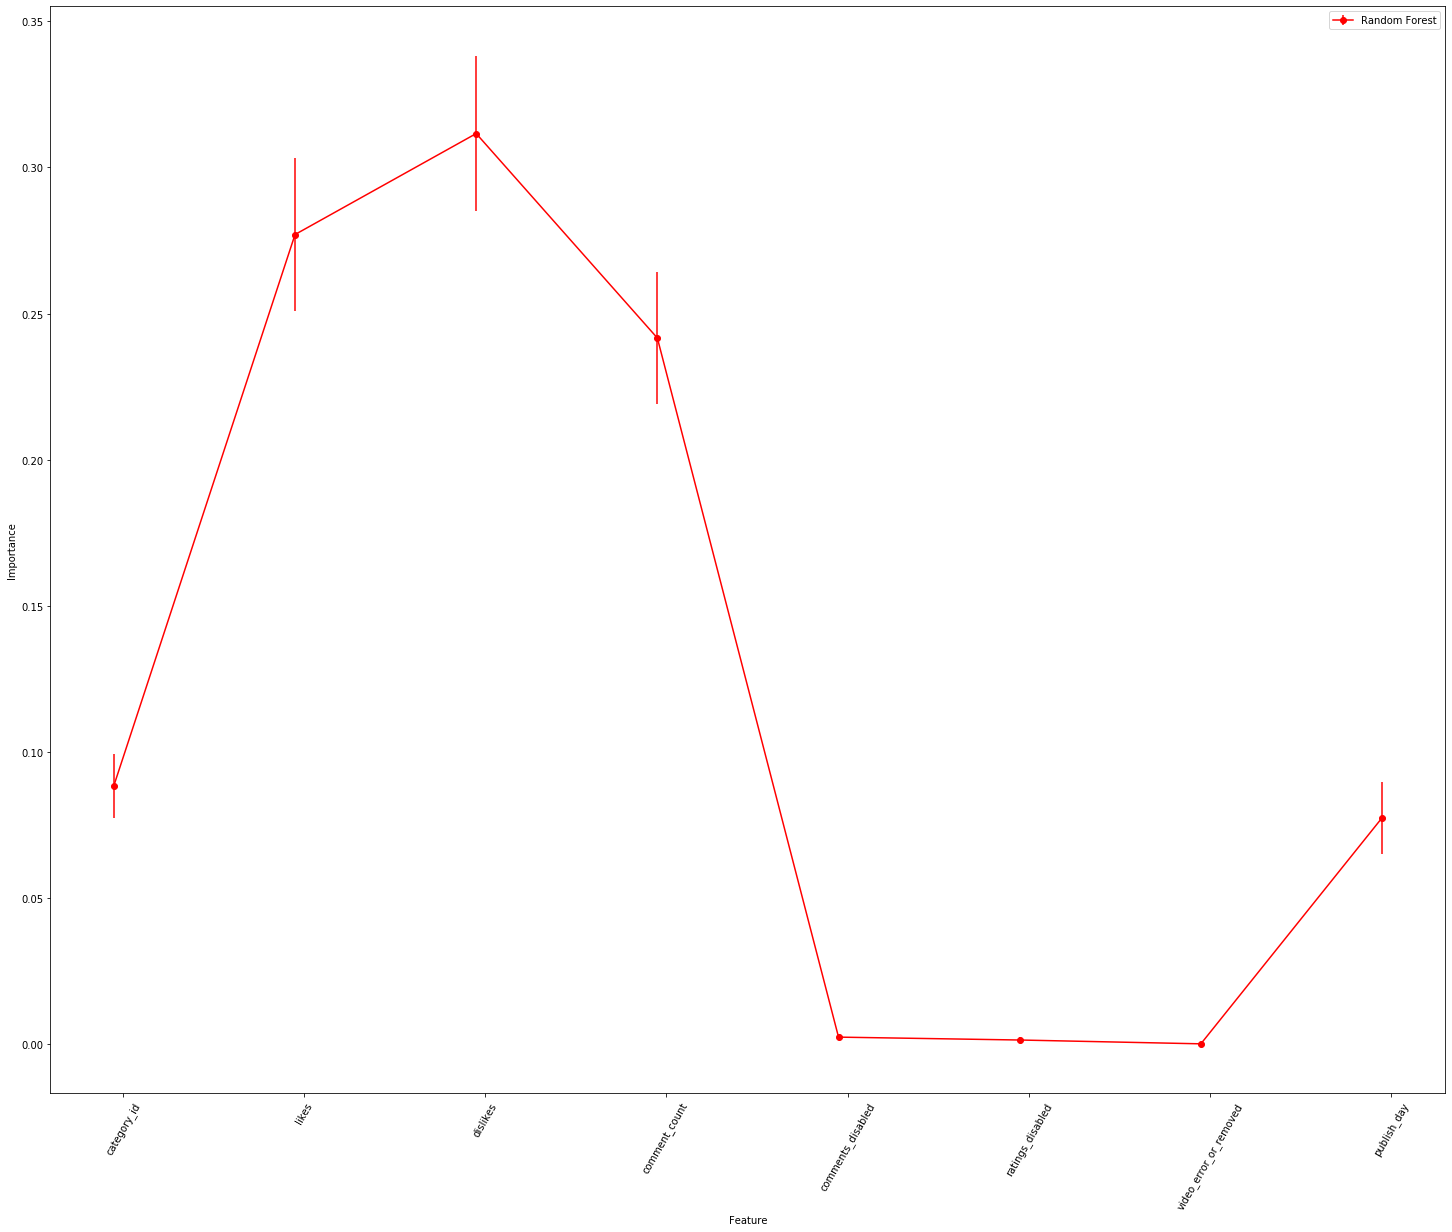

In [242]:
import matplotlib.pyplot as plt
clf.best_estimator_.named_steps["classifier"].feature_importances_
clf_std  = np.std([tree.feature_importances_ for tree in  clf.best_estimator_.named_steps["classifier"]], axis=0)
plt.errorbar(np.arange(len(df_columns[0:8]))-0.05,  clf.best_estimator_.named_steps["classifier"].feature_importances_, 
             yerr= clf_std, fmt='o-r', label='Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(np.arange(len(df_columns[0:8])), df_columns[0:8], rotation=60)
plt.legend()

plt.show()

We can see that likes, dislikes and comment_count are the most important features.
we can further do PCA for dimensionality reduction and run models again.